# Basic Statistics (Part 1)

**Prerequisite:**
- None


**We will learn:**

- Random variable (RV), how to generate random numbers in $\texttt{python}$
- Basic statistics (mean, median, standard deviation)
- Histograms


A good reference: [A Beginner Guide to Astro-Statistics and Astro-Machine-Learning, by Yuan-Sen Ting](https://computeastro.streamlit.app/)

In [2]:
# Let's start with importing our packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

## 1. Random variable, histogram, probability

Let's look at a cubic die with faces numbered from 1 to 6. When you roll a die once, you write down the number on the top (e.g., 4). Then when you roll it again, you might see a different number (e.g., 2). You can repeat this many times, and you will probably see all six numbers. An event such as a die roll is called a **random event**. The outcome of a die roll is a **random variable**. Let's denote the random variable of a die roll as $X$, so the value of $X$ must be in $\{1, 2, 3, 4, 5, 6\}$. One must realize that a random variable is a variable -- it can have different values $x$ when repeating the random event. 


Let's use Python to generate random numbers to get a sense of rolling a "fair" die. `np.random.randint` (or `scipy.stats.randint`) provides a nice function to generate a random variable that is an integer between 1 and 6.

In [3]:
# run this cell many times, as if you are rolling a die
print(np.random.randint(low=1, high=6+1)) # notice that `high` is one plus the highest number of our random variable. This trick is common in python.

1


Now you see what a random variable looks like. Shall we roll a die for 100 times and record all the outcomes?

In [4]:
N_roll = 100
outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

In [5]:
outcomes

array([1, 4, 3, 4, 2, 2, 3, 6, 1, 2, 3, 4, 1, 5, 3, 1, 6, 2, 3, 1, 3, 4,
       4, 5, 2, 4, 2, 3, 1, 1, 1, 6, 2, 5, 2, 5, 2, 3, 6, 1, 1, 3, 3, 6,
       4, 2, 5, 3, 1, 1, 6, 3, 6, 1, 5, 4, 2, 6, 5, 6, 4, 6, 3, 3, 5, 3,
       6, 2, 5, 4, 5, 4, 6, 3, 2, 1, 1, 3, 6, 1, 1, 2, 2, 1, 6, 4, 5, 5,
       5, 2, 3, 6, 3, 3, 3, 6, 5, 2, 2, 6])

Here we use a list `outcomes` to store the outcome from each roll. The `for` loop is used to repeat the die roll for `N_roll` times. It is a good practice to define variables like `N_roll` in your code, because if you want to change the number of dice rolls to 10000, you can just change `N_roll = 10000` without touching other code. The benefit of this practice will manifest itself as we go on in this course. Also, it is usually more convenient to work with numpy arrays than python lists. 

Our next task is to check the frequency of the outcome being each number between 1 and 6. 

In [6]:
np.sum(outcomes == 1) # this shows the frequency of "1" in the 100 rolls

18

In [7]:
np.sum(outcomes == 4) # this shows the frequency of "4" in the 100 rolls

12

In [8]:
# Let's use the for loop again
for i in range(1, 6+1):
    print(f'The frequency of {i} is', np.sum(outcomes == i))

The frequency of 1 is 18
The frequency of 2 is 18
The frequency of 3 is 21
The frequency of 4 is 12
The frequency of 5 is 14
The frequency of 6 is 17


Again, `numpy` provides shortcut functions to do this:

In [9]:
values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)
print(list(zip(values, counts)))

[1 2 3 4 5 6] [18 18 21 12 14 17]
[(1, 18), (2, 18), (3, 21), (4, 12), (5, 14), (6, 17)]


Histogram is a good tool to visualize this result

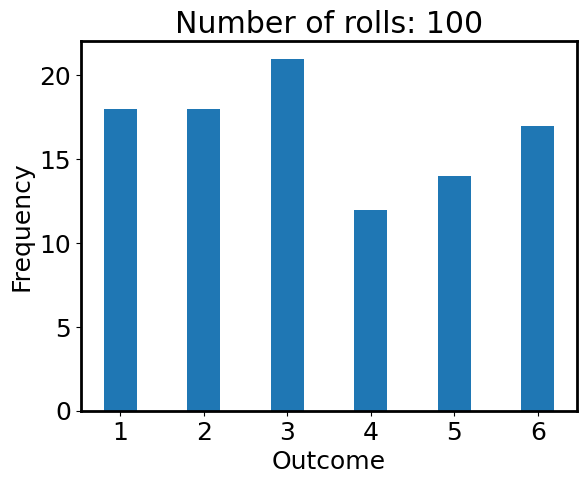

In [10]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}');

Is the die fair? Seems **no** from the figure above, because the frequencies of all numbers are not the same. This contradicts our assumption of using `np.random.randint` where the outcomes should be random. What's happening here? Let's calculate the chance of the outcome being each number:

In [11]:
chances = counts / N_roll
print(chances)

[0.18 0.18 0.21 0.12 0.14 0.17]


If the die is fair, the chances should all be 1/6 = 0.1667. We see that the `chances` are not exactly 0.1667, but quite close. In math, this "chance" is called "probability". 

### Exercise 1
Let's increase `N_roll` to 10000, repeat the above exercise again and plot the histogram. In `plt.hist` function, you can turn on `density=True` to plot the "normalized frequency" (each frequency divided by the sum of all frequencies, i.e., total number of rolls). The normalized frequencies should be very close to the probability 1/6 (red dashed line).

The purpose is to acknowledge an important thing: the conclusion is subject to statistical uncertainty when the sample size is too small.

In [12]:
## Your answer here

---

## 2. Mean, Median, Standard Deviation

These are the most useful statistics and are of great importance in astronomical data. If we have a set of data $\{x_1, x_2, \dots, x_{n}\}$, these statistics are defined to be:

- Mean: $\overline{x} = \dfrac{1}{n}(x_1 + x_2 + \cdots + x_n) = \dfrac{\sum_i x_i}{n}$

- Median: "the middle number". This is found by ordering all data and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers)

- Standard deviation: it measures how dispersed the data is $\sigma = \sqrt{\dfrac{\sum_i(x_i - \overline{x})^2}{n}}$.

- Variance: it is typically the square of standard deviation, $\sigma^2$. 

> Someone uses $1/(n-1)$ instead of $1/n$ in the definition of standard deviation. This is a correction known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). It accounts for the fact that when we calculate the sample variance, we've already used one degree of freedom to estimate the mean. Since the deviations from the mean must sum to zero, once we know $n-1$ of the deviations, the last one is determined. This makes our variance estimate biased if we use $1/n$. Using $1/(n-1)$ gives us an **unbiased** estimator of the true population variance.

Let's generate some data by sampling from a **[uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)** from 0 to 1, and calculate their mean, median, and standard deviation.

In [13]:
# sample from a uniform distribution U(0, 1)
n_sample = 200 # sample size
data = np.random.uniform(0, 1, size=(n_sample,))

In [14]:
# Take a look at the data
print(data[:10])

[0.6914988  0.37063932 0.12295213 0.30167628 0.78583475 0.76212917
 0.31775762 0.66710794 0.26392734 0.22720329]


Indeed, they are decimals between 0 and 1. Is there a way to **visualize** their distribution? Yes, we just learned about **histogram**:

```{margin}
If you add ";" to a line of code in Python, it will suppress the output from that code.
```

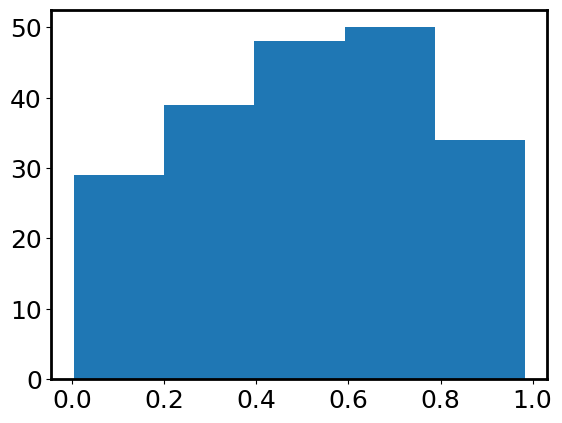

In [15]:
plt.hist(data, bins=5); # indeed, it looks like a uniform distribution

`numpy` provides some handy functions to do basic statistics. 

```{margin}
It is a good practice to check the documentation of the Python function to make sure you're using it properly. In Jupyter notebook/lab, try to type `Shift+Tab` around the function. What happens?
```

In [16]:
np.mean(data), np.median(data), np.std(data)

(0.5138544094029512, 0.5106636507384961, 0.2603890765088969)

To verify that `np.std` does return the standard deviation, we calculate it manually following $\sigma = \sqrt{\sum_i(x_i - \overline{x})^2/ n}$.

In [17]:
np.sqrt(np.sum((data - np.mean(data))**2 / len(data)))
# Okay, `np.std` does its job pretty well.

0.2603890765088969

From [Wikipedia](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) (you can also calculate by yourselves), the mean, median, and standard deviation of a uniform distribution $U[a, b]$ are $(a+b)/2$, $(a+b)/2$, and $\sqrt{3} (b-a)/ 6$. Do our numerical results agree with these analytical expressions?

### Outlier

An additional data point with a value of 100 (aka outlier) was added to the above data set unknowingly. 

In [19]:
data = np.concatenate([data, [100]])

Let's still calculate mean, median, and standard deviation.

In [20]:
np.mean(data), np.median(data), np.std(data)

(1.4988657518841102, 0.5210756765955065, 9.85352046941716)

Oooops! The mean and standard deviation are completely off, but the median remains similar to what we had above. **An outlier, being unusually small or unusually large, can greatly affect the mean but not affect the median much!** Consider using median if you worry about outliers! We will illustrate this point more when we play with the calibration files. 

---

## Exercise 2

Let's revisit the **football** data from last week in order to practice calculating the mean, median, and mode of some distributions.

In [ ]:
# Don't worry about this cell, it's just to make the notebook look a little nicer.
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Get the directory right
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  os.chdir('/content/drive/Shareddrives/AST207/data')
else:
    os.chdir('../../../_static/ObsAstroData/')

In [ ]:
# Read the catalog of the football players
cat = Table.read('./players_age.csv')

1. Calculate the **mean**, **median**, and **mode** of the player height (in inches).

In [1]:
## Your answer goes here

2. Are the three numbers different? If so, why? If not, why not?

In [ ]:
## Your answer goes here

3. Make a **histogram** of the player height in the same units. Do your answers make sense?

In [ ]:
## Your answer goes here

4. Calculate the **mean**, **median**, and **mode** of the player age. Again histogram the player age and determine if your answers make sense. 

In [ ]:
## Your answer goes here

5. Extra credit: find **height** and **age** data for typical people in the United States and compare our statistics with those of football players. How can you compare the distributions?

In [ ]:
## Your answer goes here